# 8. Conclusión Comparativa y Selección del Mejor Modelo


## **8.1 Resumen Final de Modelos**

| Modelo                                                      | Metrica Escogida (Recall) | Tiempo (aprox) | Balanceo | Optimización | Tuning | Interpretabilidad |
|-------------------------------------------------------------|---------------------------|----------------|----------|--------------|--------|-----------------|
| KNN - KD-Tree + SMOTE + GSCV                                | 0.504                     | Medio          | Sí       | GridSearchCV | Sí     | Media           |
| Bayesiano Tuned + GSCV                                      | 0.961 (sobreajustado)     | Bajo           | No       | GridSearchCV | Sí     | Alta            |
| Ridge (SAGA) + SMOTE + GSCV                                 | 0.586                     | Bajo           | Si       | GridSearchCV | Sí     | Alta            |
| Árbol de Decisión Tuned + GSCV                              | 0.486                     | Bajo           | No       | GridSearchCV | Sí     | Alta            |
| Random Forest + GSCV                                        | 0.504                     | Medio          | No       | GridSearchCV | Sí     | Media           |
| XGBoost - scale_pos_weight + Reg(L1/L2) + GaussianSearchCV  | 0.629                     | Medio-Alto     | Sí       | BayesSearchCV| Sí     | Media-Baja      |
| SVM (SGD) + SMOTE + GaussianSearchCV                        | 0.598                     | Medio-Alto     | Sí       | BayesSearchCV| Sí     | Baja            |

De los anterioes, no se tomara en cuenta el Clasificador Bayesiano por ser sobreajustado en comparacion al resto de sus metricas y con los modelos presentados.

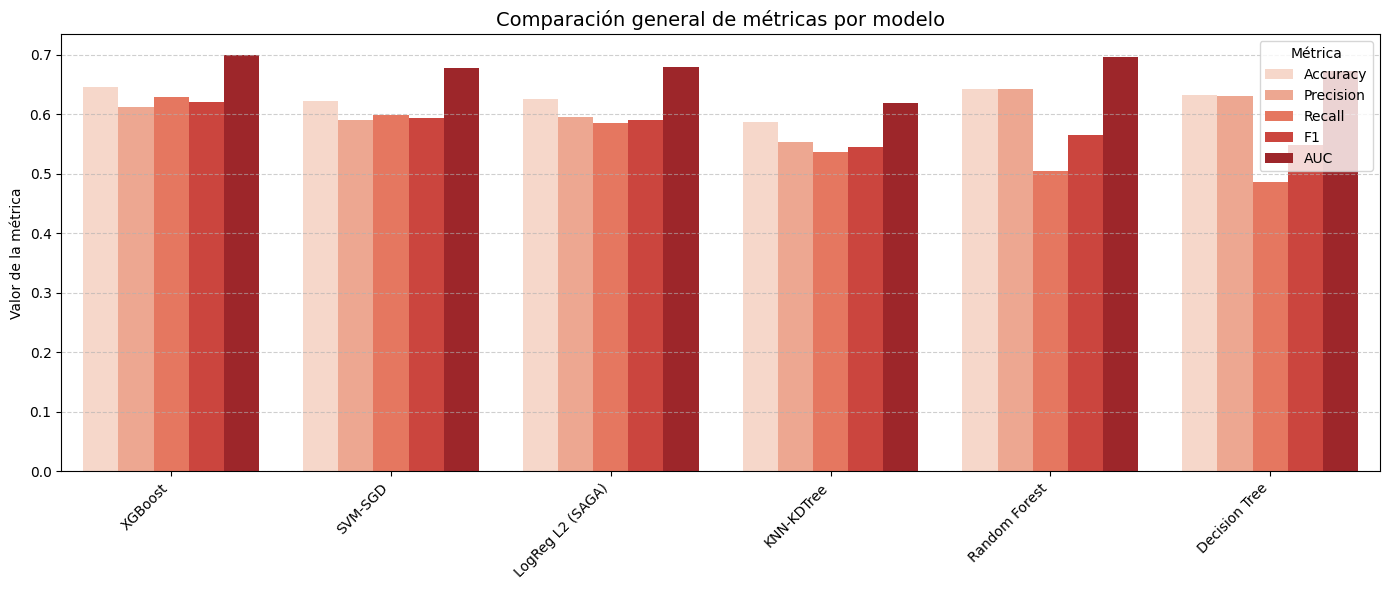

In [ ]:
df_resultados_filtrado = df_resultados.iloc[1:]

metricas = ["Accuracy", "Precision", "Recall", "F1", "AUC"]

plt.figure(figsize=(14,6))
sns.barplot(
    data=df_resultados_filtrado.melt(id_vars="Modelo", value_vars=metricas),
    x="Modelo", y="value", hue="variable", palette="Reds"
)
plt.title("Comparación general de métricas por modelo", fontsize=14)
plt.ylabel("Valor de la métrica")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()


Tras comparar los modelos en términos de **AUC, precisión, recall, F1, y capacidad de generalización**, el **modelo XGBoost - scale_pos_weight + Reg(L1/L2) + GaussianSearchCV, CV=5** se considera el más equilibrado:

- Presenta el **AUC más alto (0.700)**, lo que indica la mejor discriminación entre pacientes que reingresan y los que no.  
- El balanceo con `scale_pos_weight` permite detectar la clase minoritaria sin sacrificar demasiado la precisión.  
- La regularización L2 ayuda a evitar sobreajuste y mejora la generalización.  
- A pesar de ser más complejo que modelos lineales, su capacidad de capturar interacciones no lineales lo hace más robusto en datasets heterogéneos.


## **8.2 Ventajas y Limitaciones**

**Ventajas del modelo XGBoost:**
- Excelente capacidad de predicción y **recall alto**, crítico en este contexto clínico.  
- Manejo de clases desbalanceadas con `scale_pos_weight`.  
- Permite tuning fino de hiperparámetros para optimizar desempeño.  

**Limitaciones:**
- Interpretabilidad limitada frente a modelos lineales o árboles simples.  
- Mayor tiempo de entrenamiento y consumo de recursos que modelos simples.  
- Requiere más memoria y capacidad computacional para datasets grandes.  


XGBoost - scale_pos_weight + Reg(L1/L2) + GaussianSearchCV, CV=5 se considera el modelo final por su **capacidad de detectar pacientes de riesgo (recall)** y mantener un buen rendimiento global (AUC y F1), mientras que modelos más simples pueden usarse para análisis complementario o comunicación a personal clínico.


A futuro, se intentará desarrollar un **modelo mejorado**, explorando técnicas de:

- **Ensemble avanzado** o blending de modelos.  
- **Ingeniería de características más profunda**, incluyendo interacciones no lineales y variables derivadas.  
- **Optimización adicional de hiperparámetros**, posiblemente con Optuna o técnicas bayesianas más exhaustivas.  

El objetivo es **incrementar recall y F1**, manteniendo AUC competitivo y asegurando que el modelo sea práctico para su implementación clínica.